In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [0]:
dataSet = pd.read_excel("/content/drive/My Drive/ML project/Concrete_Data.xls")
dataSet.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [0]:
#renaming columns
dataSet = dataSet.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [0]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                  1030 non-null float64
furnace_slag            1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
super_plasticizer       1030 non-null float64
coarse_agg              1030 non-null float64
fine_agg                1030 non-null float64
age                     1030 non-null int64
compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [0]:
print (dataSet.isnull().sum())

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


In [0]:
print("Number of rows    :",dataSet.shape[0])
print("Number of columns :",dataSet.shape[1])

Number of rows    : 1030
Number of columns : 9


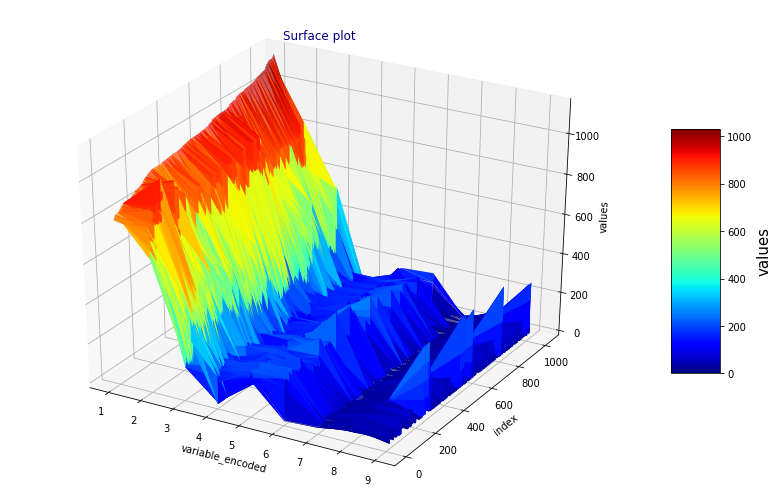

In [0]:
from mpl_toolkits.mplot3d import Axes3D
data1 = dataSet.copy()

data1 = data1.sort_values(by=['coarse_agg'],ascending=True).reset_index()

data1 = data1[['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
               'coarse_agg', 'fine_agg', 'age', 'compressive_strength']] 

df = data1.unstack().reset_index()
df.columns = ["X","Y","Z"]


df["X"] = df["X"].map({'coarse_agg':1, 'fine_agg':2 , 
                       'cement':3, 'furnace_slag':6, 'fly_ash':4,
                       'water':5, 'super_plasticizer':7,
                        'age':9, 'compressive_strength':8})
 
fig = plt.figure(figsize=(14,9))

ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
lab.set_label("values",fontsize=15)

ax.set_xlabel("variable_encoded")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

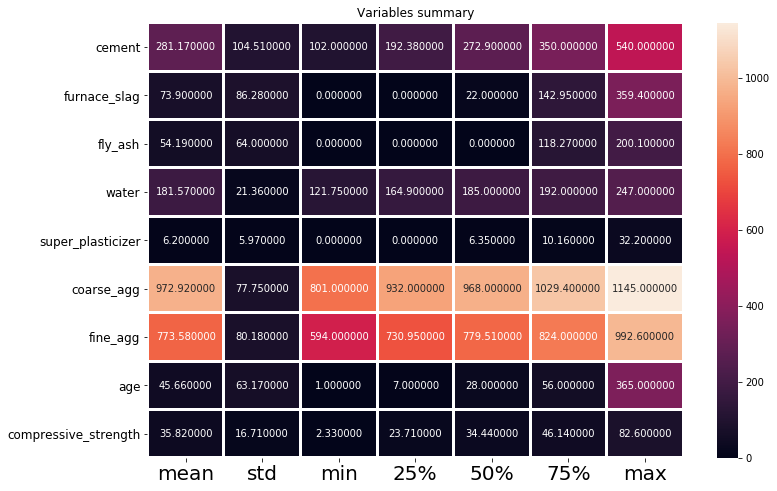

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(round(dataSet.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

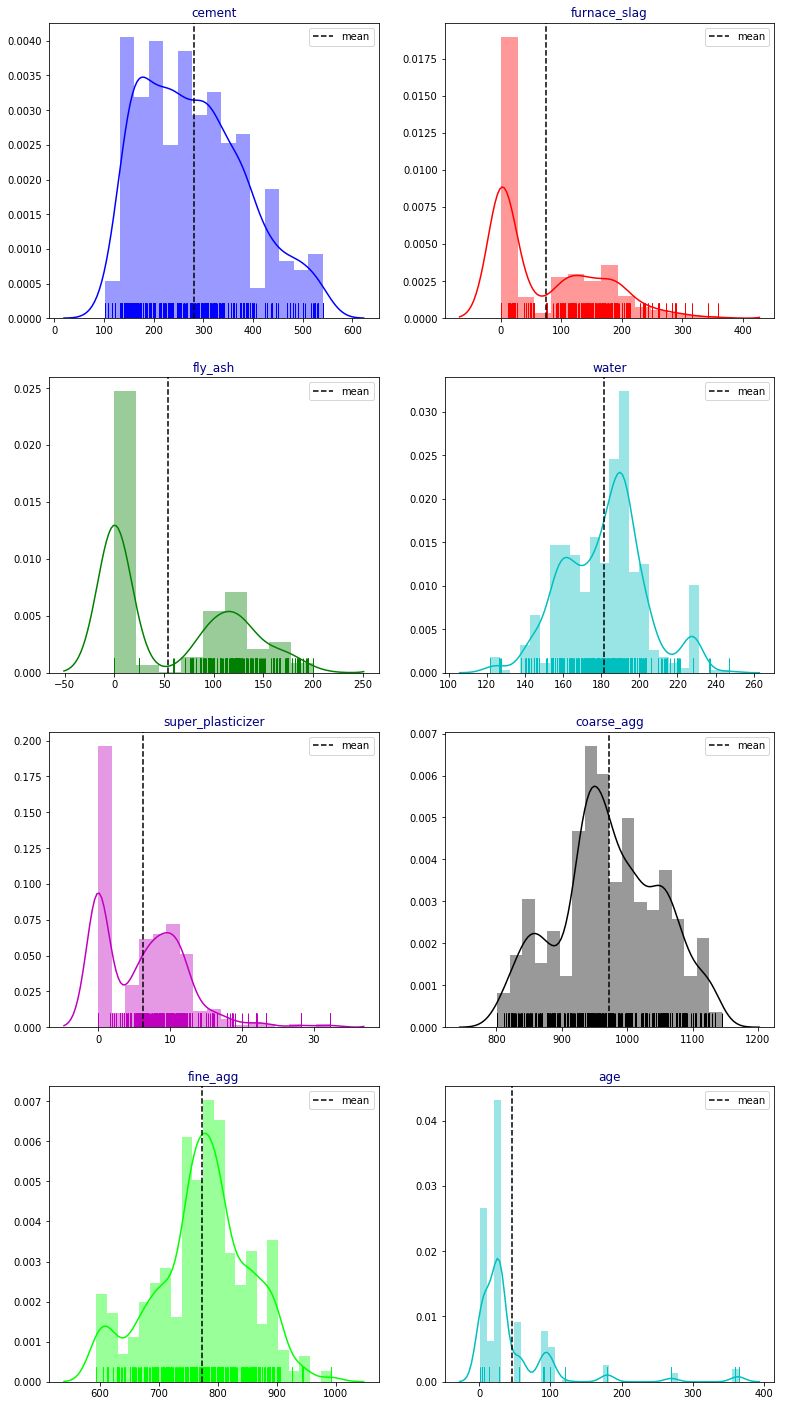

In [0]:
cols = [i for i in dataSet.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(dataSet[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(dataSet[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

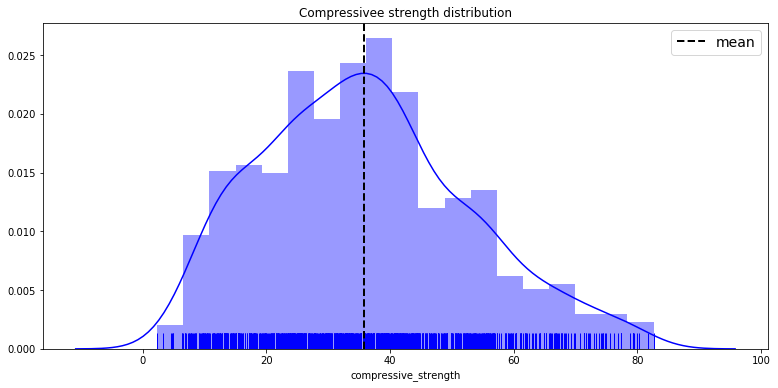

In [0]:
plt.figure(figsize=(13,6))
sns.distplot(dataSet["compressive_strength"],color="b",rug=True)
plt.axvline(dataSet["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

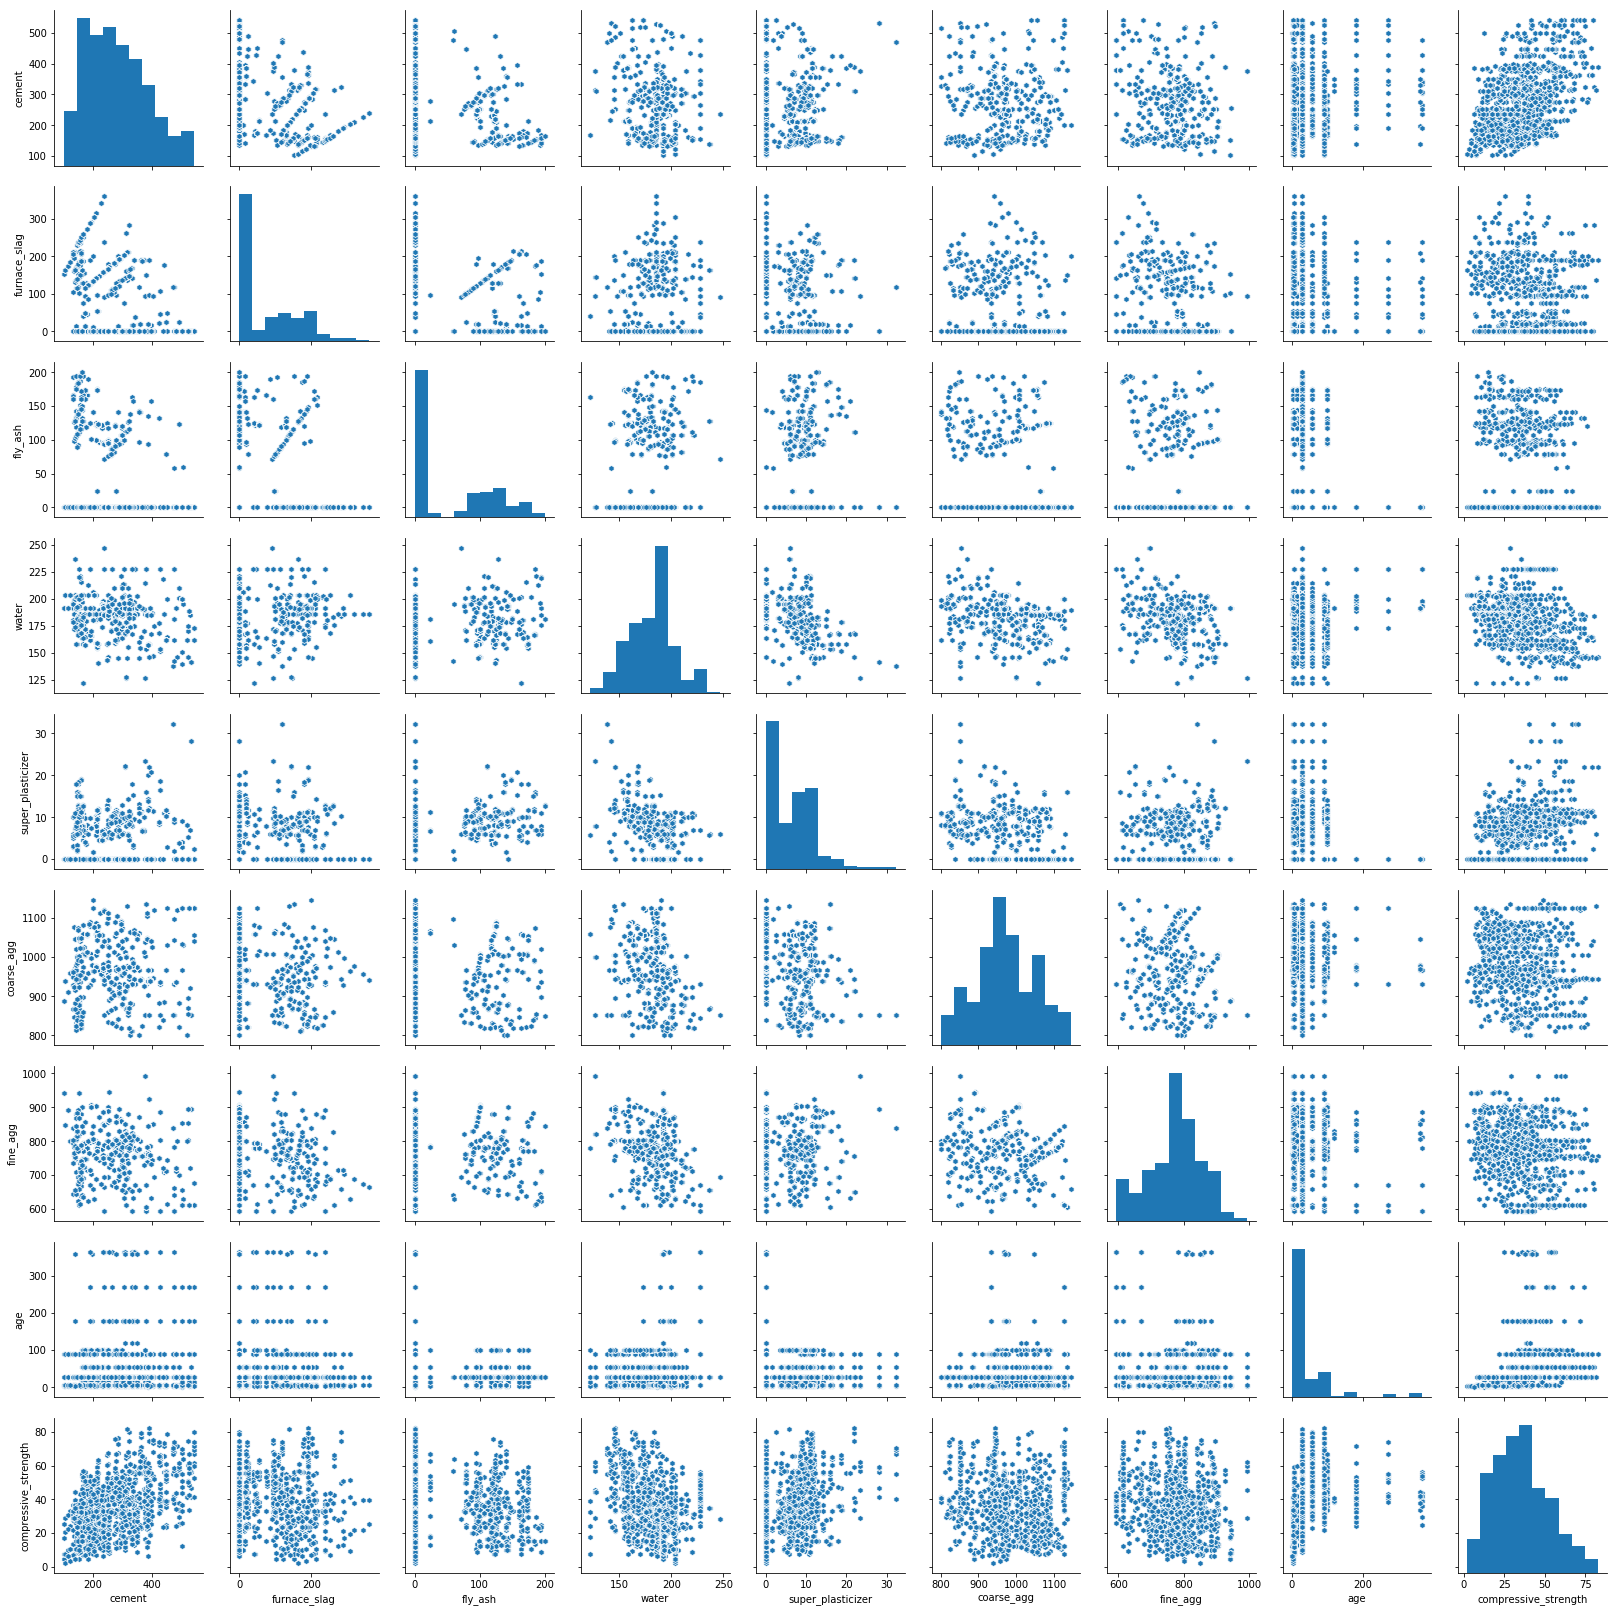

In [0]:
sns.pairplot(dataSet,markers="h")
plt.show()

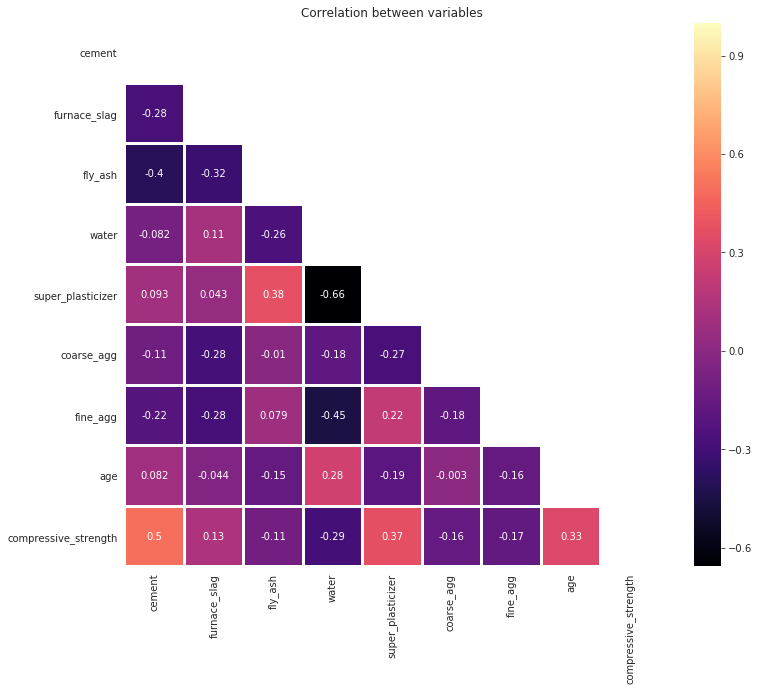

In [0]:
cor = dataSet.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

In [0]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
train,test = train_test_split(dataSet,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["compressive_strength"] + ["age_months"]]]
train_Y = train["compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["compressive_strength"] + ["age_months"]]]
test_Y  = test["compressive_strength"]




train error:
R2	: 0.99 
RMS	: 1.8338344620340892 

test error:
R2	: 0.90 
RMS	: 5.159091255423768 

comparision b/w predicted value and actual test value 


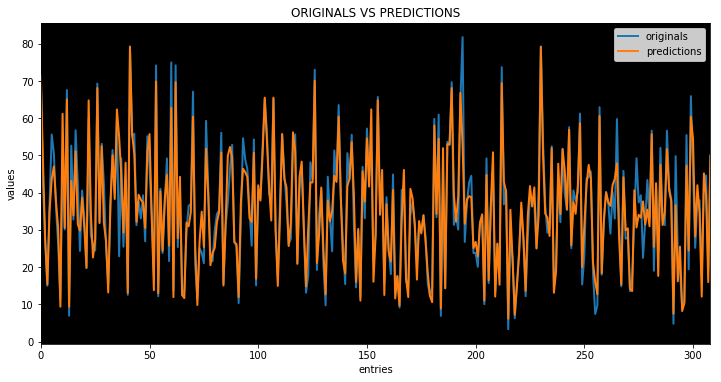

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = RandomForestRegressor(n_estimators=200)
model.fit(train_X,train_Y)

predict_train_Y= model.predict(train_X)
r2score=("%.2f" % r2_score(train_Y,predict_train_Y))
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

predict_test_Y= model.predict(test_X)
r2score=("%.2f" % r2_score(test_Y,predict_test_Y))
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

print("comparision b/w predicted value and actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["compressive_strength"]
    
ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("entries")
plt.ylabel("values")
ax.set_facecolor("k")


In [154]:
inputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]
new=[]
for i in inputName:
  print(i,":")
  new.append(float(input()))
new_X=np.array(new).reshape(1,-1)
predict_new_Y = model.predict(new_X)
print(int(predict_new_Y))
#540.0 	0.0 	0.0 	162.0 	2.5 	1040.0 	676.0 	28 	soln=79.986111
 

cement :
540.0
furnace_slag :
0.0
fly_ash :
0.0
water :
162.0
super_plasticizer :
2.5
coarse_agg :
1040.0
fine_agg :
676.0
age :
28
73
